In [59]:
#amelia triandari zahirah 202131183
# import library
import pandas as pd

In [60]:
from sklearn.feature_selection import SelectKBest, r_regression,mutual_info_regression,VarianceThreshold

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [62]:
# dapatkan data
df=pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [63]:
# untuk demonstrasi drop fitur selain numerik
df.drop(['date','street','city','statezip','country'],inplace=True,axis=1)
X=df.drop('price',axis=1)
y=df.price

In [64]:
# korelasi untuk seluruh dataset
corr_matrix = df.corr()
corr_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


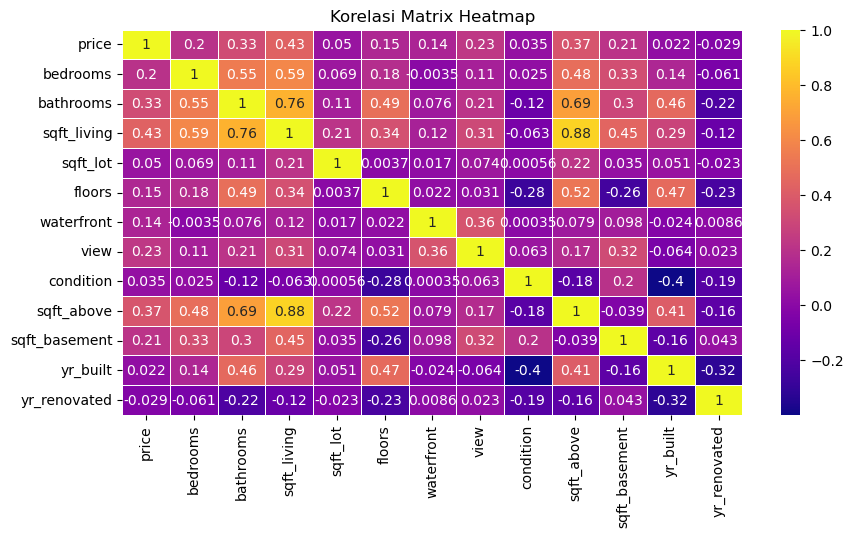

In [77]:
# Membuat gambar dan sumbu menggunakan plt.subplots() dari Matplotlib
fig, ax = plt.subplots(figsize=(10, 5))
# Membuat heatmap menggunakan seaborn pada corr_matrix
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='plasma', linewidths=.5, ax=ax)
heatmap.set_title('Korelasi Matrix Heatmap')
plt.show()

In [66]:
corr_coefficients = r_regression(X,y)
corr_coefficients,len(corr_coefficients)

(array([ 0.20033629,  0.32710992,  0.43041003,  0.0504513 ,  0.1514608 ,
         0.13564832,  0.22850417,  0.03491454,  0.3675696 ,  0.21042657,
         0.02185683, -0.02877365]),
 12)

C:\Users\zahir\AppData\Local\Temp\ipykernel_18300\2726117987.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(corr.index, rotation=45, ha='right');


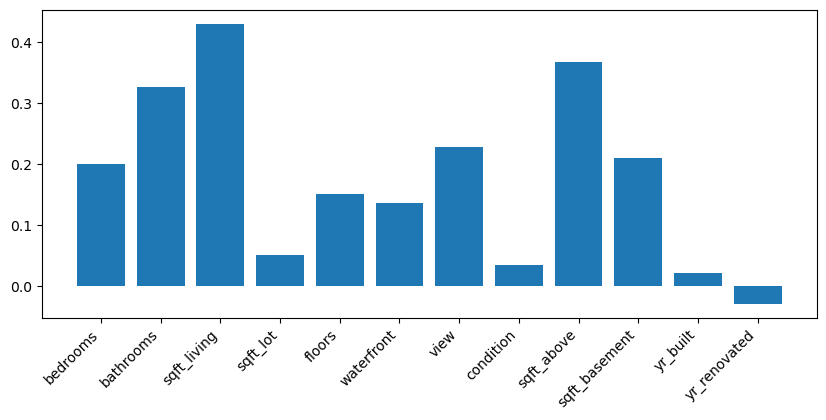

In [67]:
# plot corr dalam diagram batang
corr=pd.Series(corr_coefficients)
corr.index=X.columns
# Plot korelasi
fig,ax=plt.subplots(figsize=(10, 4))
ax.bar(corr.index,corr.values)
ax.set_xticklabels(corr.index, rotation=45, ha='right');

In [68]:
mostcorr=SelectKBest(r_regression,k=11)
new_X=mostcorr.fit_transform(X, y)

In [69]:
# fitur terbaik
mostcorr.get_feature_names_out()

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built'], dtype=object)

In [70]:
# keluaran dari fit transform adalah sebuah ndarray, jadi mari kita ubah menjadi sebuah dataframe
pd.DataFrame(new_X,columns=mostcorr.get_feature_names_out())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0
1,5.0,2.50,3650.0,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,1921.0
2,3.0,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0
3,3.0,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0
4,4.0,2.50,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,1976.0
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510.0,6360.0,1.0,0.0,0.0,4.0,1510.0,0.0,1954.0
4596,3.0,2.50,1460.0,7573.0,2.0,0.0,0.0,3.0,1460.0,0.0,1983.0
4597,3.0,2.50,3010.0,7014.0,2.0,0.0,0.0,3.0,3010.0,0.0,2009.0
4598,4.0,2.00,2090.0,6630.0,1.0,0.0,0.0,3.0,1070.0,1020.0,1974.0


In [71]:
mi_reg = mutual_info_regression(X, y)

In [72]:
mi_reg

array([0.06790346, 0.18573025, 0.34122246, 0.08762416, 0.06473819,
       0.00978384, 0.06593115, 0.00711364, 0.2407376 , 0.06316392,
       0.07043691, 0.        ])

C:\Users\zahir\AppData\Local\Temp\ipykernel_18300\3663632042.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(mi_reg.index, rotation=45, ha='right');


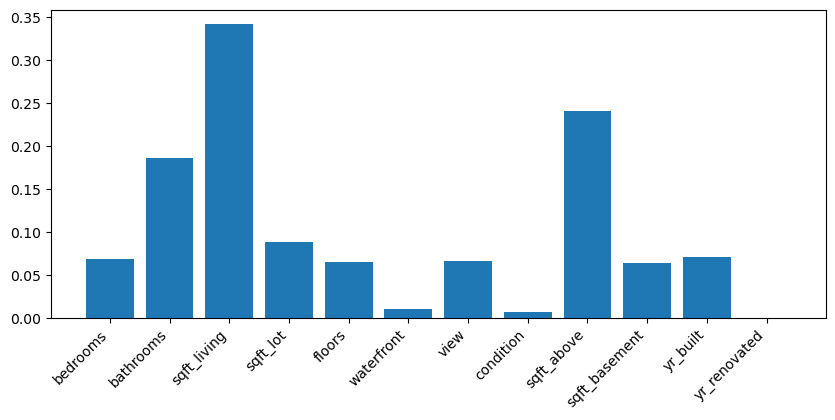

In [73]:
# plot informasi feedback dalam diagram batang
mi_reg=pd.Series(mi_reg)
mi_reg.index=X.columns
# Plot korelasi
fig,ax=plt.subplots(figsize=(10, 4))
ax.bar(mi_reg.index,mi_reg.values)
ax.set_xticklabels(mi_reg.index, rotation=45, ha='right');

In [74]:
df.waterfront.var(),df.waterfront.unique()

(0.007123996710059984, array([0, 1], dtype=int64))

In [75]:
selector = VarianceThreshold(0.2)
new_X=selector.fit_transform(X)

In [76]:
# fitur yang dipilih
pd.DataFrame(new_X,columns=selector.get_feature_names_out())

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340.0,7912.0,1.5,0.0,3.0,1340.0,0.0,1955.0,2005.0
1,5.0,2.50,3650.0,9050.0,2.0,4.0,5.0,3370.0,280.0,1921.0,0.0
2,3.0,2.00,1930.0,11947.0,1.0,0.0,4.0,1930.0,0.0,1966.0,0.0
3,3.0,2.25,2000.0,8030.0,1.0,0.0,4.0,1000.0,1000.0,1963.0,0.0
4,4.0,2.50,1940.0,10500.0,1.0,0.0,4.0,1140.0,800.0,1976.0,1992.0
...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510.0,6360.0,1.0,0.0,4.0,1510.0,0.0,1954.0,1979.0
4596,3.0,2.50,1460.0,7573.0,2.0,0.0,3.0,1460.0,0.0,1983.0,2009.0
4597,3.0,2.50,3010.0,7014.0,2.0,0.0,3.0,3010.0,0.0,2009.0,0.0
4598,4.0,2.00,2090.0,6630.0,1.0,0.0,3.0,1070.0,1020.0,1974.0,0.0
